## Flight Price Prediction

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [84]:
train_df = pd.read_excel("EDA03_data/Data_Train.xlsx")
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [85]:
test_df= pd.read_excel("EDA03_data/Test_set.xlsx")
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [86]:
final_df = pd.concat([train_df, test_df], ignore_index=True)
final_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [87]:
final_df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
13349,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
13350,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
13351,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
13352,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
13353,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


In [88]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.1+ MB


In [89]:
## Feature Engineering
final_df['Date']= final_df['Date_of_Journey'].str.split('/').str[0].astype(int)
final_df['Month']= final_df['Date_of_Journey'].str.split('/').str[1].astype(int)
final_df['Year']= final_df['Date_of_Journey'].str.split('/').str[2].astype(int)
final_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [90]:
final_df.drop('Date_of_Journey', axis=1, inplace=True)

In [91]:
final_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [92]:
final_df["Arrival_Time"].str.split(' ').str[0]
final_df['Arrival_Time'] = final_df['Arrival_Time'].apply(lambda x: x.split(' ')[0])

In [93]:
final_df.isnull().sum()

Airline               0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
Date                  0
Month                 0
Year                  0
dtype: int64

In [94]:
final_df['Arrival_hour'] = final_df['Arrival_Time'].str.split(':').str[0].astype(int)
final_df['Arrival_min'] = final_df['Arrival_Time'].str.split(':').str[1].astype(int)
final_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35


In [95]:
final_df['Departure_hour'] = final_df['Dep_Time'].str.split(':').str[0].astype(int)
final_df['Departure_min'] = final_df['Dep_Time'].str.split(':').str[1].astype(int)
final_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Departure_hour,Departure_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35,16,50


In [96]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Dep_Time         13354 non-null  object 
 5   Arrival_Time     13354 non-null  object 
 6   Duration         13354 non-null  object 
 7   Total_Stops      13353 non-null  object 
 8   Additional_Info  13354 non-null  object 
 9   Price            10683 non-null  float64
 10  Date             13354 non-null  int64  
 11  Month            13354 non-null  int64  
 12  Year             13354 non-null  int64  
 13  Arrival_hour     13354 non-null  int64  
 14  Arrival_min      13354 non-null  int64  
 15  Departure_hour   13354 non-null  int64  
 16  Departure_min    13354 non-null  int64  
dtypes: float64(1

In [97]:
final_df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [98]:
final_df['Total_Stops'] = final_df['Total_Stops'].map({'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4, 'nan':1})

In [99]:
final_df.drop('Route', axis=1, inplace=True)

In [100]:
final_df.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Departure_hour,Departure_min
0,IndiGo,Banglore,New Delhi,22:20,01:10,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,09:25,04:25,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50


In [101]:
final_df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [ ]:
# Duration processing - convert to total minutes
def parse_duration(duration_str):
    if pd.isna(duration_str):
        return 0
    
    total_minutes = 0
    duration_str = str(duration_str).strip()
    
    # Extract hours
    if 'h' in duration_str:
        hours = int(duration_str.split('h')[0].strip())
        total_minutes += hours * 60
    
    # Extract minutes
    if 'm' in duration_str:
        # Get the part after 'h' if it exists, otherwise the whole string
        if 'h' in duration_str:
            minutes_part = duration_str.split('h')[1].replace('m', '').strip()
        else:
            minutes_part = duration_str.replace('m', '').strip()
        
        if minutes_part:  # Only convert if not empty
            total_minutes += int(minutes_part)
    
    return total_minutes

# Apply the function to convert Duration to total minutes
final_df['Duration'] = final_df['Duration'].apply(parse_duration)
final_df.drop('Duration', axis=1, inplace=True)
# Create duration_hour column (hours component only)
final_df['duration_hour'] = final_df['Duration'] // 60  # Integer division to get hours

In [142]:
final_df.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Departure_hour,Departure_min,duration_hour
0,IndiGo,Banglore,New Delhi,22:20,01:10,0.0,No info,3897.0,24,3,2019,1,10,22,20,2
1,Air India,Kolkata,Banglore,05:50,13:15,2.0,No info,7662.0,1,5,2019,13,15,5,50,7
2,Jet Airways,Delhi,Cochin,09:25,04:25,2.0,No info,13882.0,9,6,2019,4,25,9,25,19
3,IndiGo,Kolkata,Banglore,18:05,23:30,1.0,No info,6218.0,12,5,2019,23,30,18,5,5
4,IndiGo,Banglore,New Delhi,16:50,21:35,1.0,No info,13302.0,1,3,2019,21,35,16,50,4


In [143]:
final_df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [145]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
final_df['Airline'] = le.fit_transform(final_df['Airline'])
final_df['Source'] = le.fit_transform(final_df['Source'])
final_df['Destination'] = le.fit_transform(final_df['Destination'])
final_df['Additional_Info'] = le.fit_transform(final_df['Additional_Info'])

In [151]:
final_df.shape


(13354, 14)

In [149]:
final_df.drop('Dep_Time', axis=1, inplace=True)
final_df.drop('Arrival_Time', axis=1, inplace=True)

In [150]:
final_df.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Departure_hour,Departure_min,duration_hour
0,3,0,5,0.0,8,3897.0,24,3,2019,1,10,22,20,2
1,1,3,0,2.0,8,7662.0,1,5,2019,13,15,5,50,7


In [160]:
df1 = pd.get_dummies(final_df,columns=['Airline','Source','Destination','Additional_Info'], drop_first=True)
df1.head()


,Total_Stops,Price,Date,Month,Year,Arrival_hour,Arrival_min,Departure_hour,Departure_min,duration_hour,...,Destination_5,Additional_Info_1,Additional_Info_2,Additional_Info_3,Additional_Info_4,Additional_Info_5,Additional_Info_6,Additional_Info_7,Additional_Info_8,Additional_Info_9
0,0.0,3897.0,24,3,2019,1,10,22,20,2,...,True,False,False,False,False,False,False,False,True,False
1,2.0,7662.0,1,5,2019,13,15,5,50,7,...,False,False,False,False,False,False,False,False,True,False
2,2.0,13882.0,9,6,2019,4,25,9,25,19,...,False,False,False,False,False,False,False,False,True,False
3,1.0,6218.0,12,5,2019,23,30,18,5,5,...,False,False,False,False,False,False,False,False,True,False
4,1.0,13302.0,1,3,2019,21,35,16,50,4,...,True,False,False,False,False,False,False,False,True,False


In [164]:
# Flight Price Prediction Model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Check for missing values before modeling
print("Checking for missing values in the dataset:")
print(df1.isnull().sum())

# Clean the data - remove rows with missing Price values
print(f"\nOriginal dataset shape: {df1.shape}")
df1_clean = df1.dropna(subset=['Price'])  # Remove rows where Price is NaN
print(f"After removing missing prices: {df1_clean.shape}")

# Also remove any remaining NaN values in features
df1_clean = df1_clean.dropna()
print(f"After removing all NaN values: {df1_clean.shape}")

# Prepare the data
# Separate features and target variable
X = df1_clean.drop('Price', axis=1)  # Features (all columns except Price)
y = df1_clean['Price']  # Target variable (Price)

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Target variable statistics:")
print(y.describe())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

# Model 1: Random Forest Regressor
print("\n--- Training Random Forest Model ---")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Make predictions
rf_train_pred = rf_model.predict(X_train)
rf_test_pred = rf_model.predict(X_test)

# Evaluate Random Forest
print("Random Forest Results:")
print(f"Training R² Score: {r2_score(y_train, rf_train_pred):.4f}")
print(f"Testing R² Score: {r2_score(y_test, rf_test_pred):.4f}")
print(f"Testing MAE: {mean_absolute_error(y_test, rf_test_pred):.2f}")
print(f"Testing RMSE: {np.sqrt(mean_squared_error(y_test, rf_test_pred)):.2f}")

# Model 2: Linear Regression
print("\n--- Training Linear Regression Model ---")
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
lr_train_pred = lr_model.predict(X_train)
lr_test_pred = lr_model.predict(X_test)

# Evaluate Linear Regression
print("Linear Regression Results:")
print(f"Training R² Score: {r2_score(y_train, lr_train_pred):.4f}")
print(f"Testing R² Score: {r2_score(y_test, lr_test_pred):.4f}")
print(f"Testing MAE: {mean_absolute_error(y_test, lr_test_pred):.2f}")
print(f"Testing RMSE: {np.sqrt(mean_squared_error(y_test, lr_test_pred)):.2f}")

# Feature Importance (Random Forest)
print("\n--- Top 10 Most Important Features ---")
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print(feature_importance.head(10))

Checking for missing values in the dataset:
Total_Stops             1
Price                2671
Date                    0
Month                   0
Year                    0
Arrival_hour            0
Arrival_min             0
Departure_hour          0
Departure_min           0
duration_hour           0
Airline_1               0
Airline_2               0
Airline_3               0
Airline_4               0
Airline_5               0
Airline_6               0
Airline_7               0
Airline_8               0
Airline_9               0
Airline_10              0
Airline_11              0
Source_1                0
Source_2                0
Source_3                0
Source_4                0
Destination_1           0
Destination_2           0
Destination_3           0
Destination_4           0
Destination_5           0
Additional_Info_1       0
Additional_Info_2       0
Additional_Info_3       0
Additional_Info_4       0
Additional_Info_5       0
Additional_Info_6       0
Additional_Info_7   

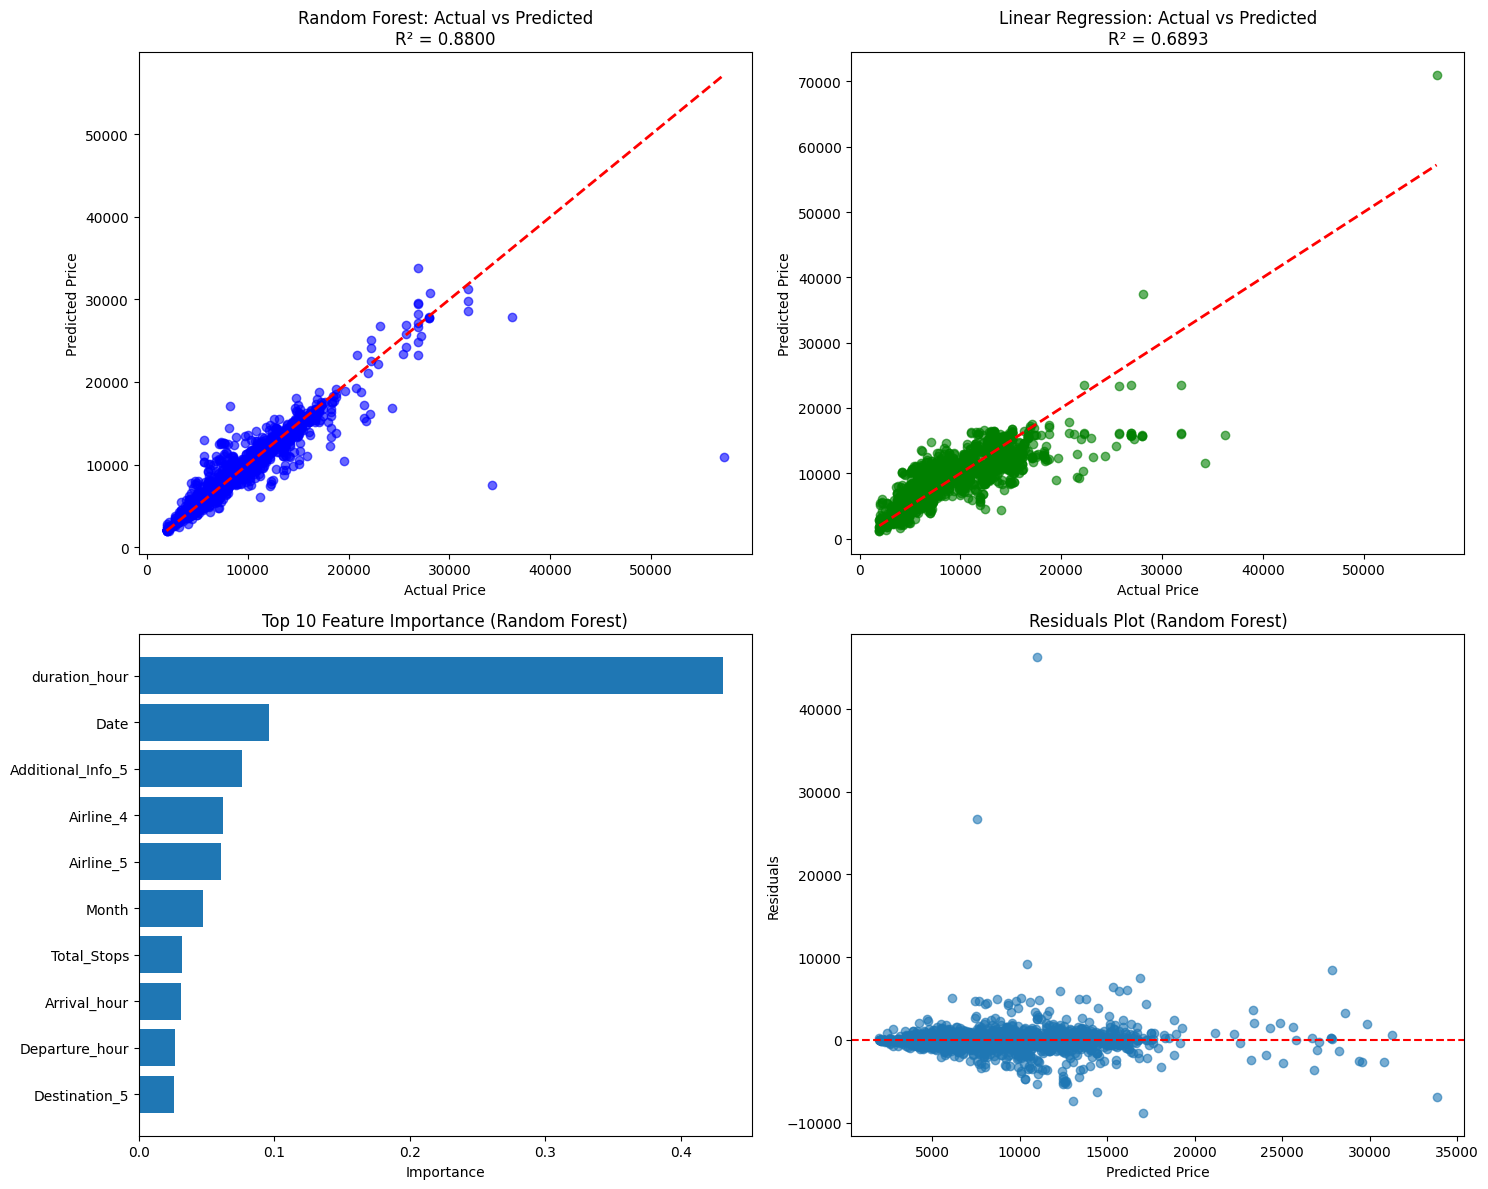


 Model Comparison Summary
               Model  R² Score          MAE         RMSE
0      Random Forest  0.879978   632.615866  1608.703765
1  Linear Regression  0.689346  1777.487133  2588.114806


In [172]:
# Visualize Model Performance
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Random Forest - Actual vs Predicted
axes[0, 0].scatter(y_test, rf_test_pred, alpha=0.6, color='blue')
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Actual Price')
axes[0, 0].set_ylabel('Predicted Price')
axes[0, 0].set_title(f'Random Forest: Actual vs Predicted\nR² = {r2_score(y_test, rf_test_pred):.4f}')

# Linear Regression - Actual vs Predicted
axes[0, 1].scatter(y_test, lr_test_pred, alpha=0.6, color='green')
axes[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 1].set_xlabel('Actual Price')
axes[0, 1].set_ylabel('Predicted Price')
axes[0, 1].set_title(f'Linear Regression: Actual vs Predicted\nR² = {r2_score(y_test, lr_test_pred):.4f}')

# Feature Importance Plot
top_features = feature_importance.head(10)
axes[1, 0].barh(top_features['feature'], top_features['importance'])
axes[1, 0].set_xlabel('Importance')
axes[1, 0].set_title('Top 10 Feature Importance (Random Forest)')
axes[1, 0].invert_yaxis()

# Residuals Plot for Random Forest
residuals = y_test - rf_test_pred
axes[1, 1].scatter(rf_test_pred, residuals, alpha=0.6)
axes[1, 1].axhline(y=0, color='r', linestyle='--')
axes[1, 1].set_xlabel('Predicted Price')
axes[1, 1].set_ylabel('Residuals')
axes[1, 1].set_title('Residuals Plot (Random Forest)')

plt.tight_layout()
plt.show()

# Model Comparison
print("\n Model Comparison Summary")
comparison = pd.DataFrame({
    'Model': ['Random Forest', 'Linear Regression'],
    'R² Score': [r2_score(y_test, rf_test_pred), r2_score(y_test, lr_test_pred)],
    'MAE': [mean_absolute_error(y_test, rf_test_pred), mean_absolute_error(y_test, lr_test_pred)],
    'RMSE': [np.sqrt(mean_squared_error(y_test, rf_test_pred)), np.sqrt(mean_squared_error(y_test, lr_test_pred))]
})
print(comparison)